<a href="https://colab.research.google.com/github/Hataeju/Regression/blob/main/%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [30]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score

In [31]:
diabetes = datasets.load_diabetes()
diabetes

{'data': array([[ 0.03807591,  0.05068012,  0.06169621, ..., -0.00259226,
          0.01990749, -0.01764613],
        [-0.00188202, -0.04464164, -0.05147406, ..., -0.03949338,
         -0.06833155, -0.09220405],
        [ 0.08529891,  0.05068012,  0.04445121, ..., -0.00259226,
          0.00286131, -0.02593034],
        ...,
        [ 0.04170844,  0.05068012, -0.01590626, ..., -0.01107952,
         -0.04688253,  0.01549073],
        [-0.04547248, -0.04464164,  0.03906215, ...,  0.02655962,
          0.04452873, -0.02593034],
        [-0.04547248, -0.04464164, -0.0730303 , ..., -0.03949338,
         -0.00422151,  0.00306441]]),
 'target': array([151.,  75., 141., 206., 135.,  97., 138.,  63., 110., 310., 101.,
         69., 179., 185., 118., 171., 166., 144.,  97., 168.,  68.,  49.,
         68., 245., 184., 202., 137.,  85., 131., 283., 129.,  59., 341.,
         87.,  65., 102., 265., 276., 252.,  90., 100.,  55.,  61.,  92.,
        259.,  53., 190., 142.,  75., 142., 155., 225.,  59

# Regression용 데이터 준비

In [32]:
# scikit-learn toy dataset 로드
# Regression 문제를 위한 당뇨병 예측 데이터셋을 로드
diabetes = datasets.load_diabetes()
print(diabetes.feature_names)

['age', 'sex', 'bmi', 'bp', 's1', 's2', 's3', 's4', 's5', 's6']


In [ ]:
# bmi : Body mass index(체중을 키의 제곱으로 나눈 값을 통해 지방의 양을 추정하는 비만측정법)
# bp: Average blood pressure
# s6: glu, blood sugar level

In [33]:
# 데이터 프레임으로 변환
df = pd.DataFrame(data=diabetes.data, columns=diabetes.feature_names)
df['target'] = diabetes.target
df

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0
...,...,...,...,...,...,...,...,...,...,...,...
437,0.041708,0.050680,0.019662,0.059744,-0.005697,-0.002566,-0.028674,-0.002592,0.031193,0.007207,178.0
438,-0.005515,0.050680,-0.015906,-0.067642,0.049341,0.079165,-0.028674,0.034309,-0.018114,0.044485,104.0
439,0.041708,0.050680,-0.015906,0.017293,-0.037344,-0.013840,-0.024993,-0.011080,-0.046883,0.015491,132.0
440,-0.045472,-0.044642,0.039062,0.001215,0.016318,0.015283,-0.028674,0.026560,0.044529,-0.025930,220.0


In [34]:
cor_order = diabetes_corr.target.sort_values(ascending=False)
cor_order

cor_order = diabetes_corr.loc[:'s6','target'].abs().sort_values(ascending=False)
cor_order

,target
bmi,0.586450
s5,0.565883
bp,0.441482
s4,0.430453
s3,0.394789
s6,0.382483
s1,0.212022
age,0.187889
s2,0.174054
sex,0.043062


In [35]:
# 별다른 전처리는 수행하지 않는다. (결측치, 이상치, 명목형변수 등 없고 정규화 되어있음)
df.head()

diabetes_corr = df.corr()
diabetes_corr

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,target
age,1.000000,0.173737,0.185085,0.335428,0.260061,0.219243,-0.075181,0.203841,0.270774,0.301731,0.187889
sex,0.173737,1.000000,0.088161,0.241010,0.035277,0.142637,-0.379090,0.332115,0.149916,0.208133,0.043062
bmi,0.185085,0.088161,1.000000,0.395411,0.249777,0.261170,-0.366811,0.413807,0.446157,0.388680,0.586450
bp,0.335428,0.241010,0.395411,1.000000,0.242464,0.185548,-0.178762,0.257650,0.393480,0.390430,0.441482
s1,0.260061,0.035277,0.249777,0.242464,1.000000,0.896663,0.051519,0.542207,0.515503,0.325717,0.212022
s2,0.219243,0.142637,0.261170,0.185548,0.896663,1.000000,-0.196455,0.659817,0.318357,0.290600,0.174054
s3,-0.075181,-0.379090,-0.366811,-0.178762,0.051519,-0.196455,1.000000,-0.738493,-0.398577,-0.273697,-0.394789
s4,0.203841,0.332115,0.413807,0.257650,0.542207,0.659817,-0.738493,1.000000,0.617859,0.417212,0.430453
s5,0.270774,0.149916,0.446157,0.393480,0.515503,0.318357,-0.398577,0.617859,1.000000,0.464669,0.565883
s6,0.301731,0.208133,0.388680,0.390430,0.325717,0.290600,-0.273697,0.417212,0.464669,1.000000,0.382483


# 모델 학습

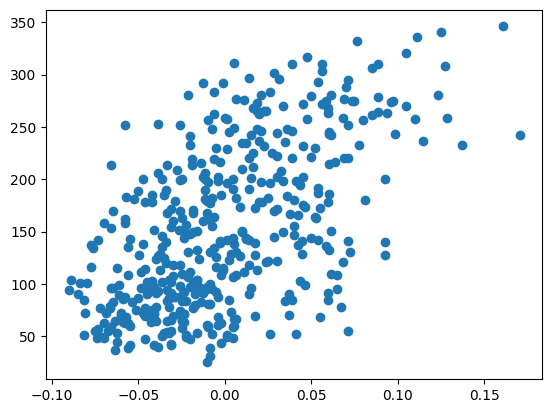

In [41]:
# 모델원리를 직관적으로 파악하기 위해 1개 Feature만 선택한다.
X=df[['bmi']]
y=df['target']
plt.scatter(X,y)

In [42]:
# 학습/테스트 데이터 분리
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# 학습/평가 데이터 분리
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.4, random_state=42)

In [44]:
train_X

,bmi
264,0.028284
204,0.006728
304,-0.038540
61,0.004572
305,-0.039618
...,...
222,-0.025607
277,-0.059019
404,0.054152
106,-0.076264


In [45]:
# 모델 학습
model = LinearRegression()
model.fit(train_X, train_y)

LinearRegression()

In [47]:
# 학습된 모델 attribute 확인
print ("각 독립변수들의 계수(기울기): ", model.coef_)
print ("행렬의 rank: ", model.rank_)
#print ("행렬의 특이값: ", model.singular_)
print ("모델의 절편: ", model.intercept_)
print ("fit될때까지 살펴본 feature의 수: ", model.n_features_in_)

각 독립변수들의 계수(기울기):  [935.16175035]
행렬의 rank:  1
모델의 절편:  149.71930576055988
fit될때까지 살펴본 feature의 수:  1


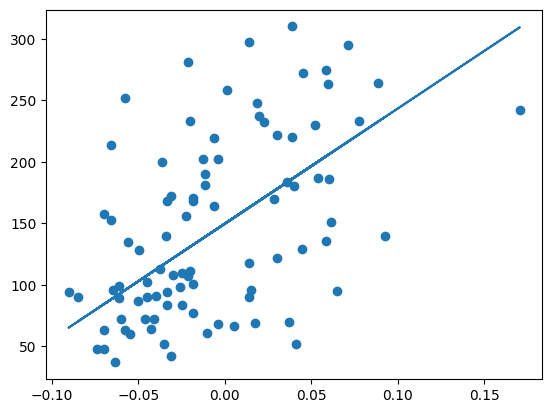

In [49]:
# 학습 결과 확인

y_pred = model.predict(test_X)
plt.scatter(test_X, test_y)
plt.plot(test_X, y_pred)
plt.show()


# 모델 평가

In [50]:
# 모델 성능 평가 (R^2)
print("훈련 데이터셋 R^2: {}".format(model.score(train_X, train_y)))
print("평가용 데이터셋 R^2: {}".format(model.score(val_X, val_y)))

훈련 데이터셋 R^2: 0.3315371558919008
평가용 데이터셋 R^2: 0.40625022857132


# 모델링 2차

In [82]:
# Feature 선정
X = df[['bmi', 'bp', 's6']]
y = df['target']

# 학습/테스트 데이터 분리
train_X, test_X, train_y, test_y = train_test_split(X, y, test_size=0.2, random_state=42)

# 학습/평가 데이터 분리
train_X, val_X, train_y, val_y = train_test_split(train_X, train_y, test_size=0.4, random_state=42)

# 모델 학습
model= LinearRegression()
model.fit(train_X, train_y)


# 모델 성능 평가 (R^2)
print("훈련 데이터셋 R^2: {}".format(model.score(train_X, train_y)))
print("평가 데이터셋 R^2: {}".format(model.score(val_X, val_y)))

훈련 데이터셋 R^2: 0.40393173961222073
평가 데이터셋 R^2: 0.44995306466112284


In [83]:
# 선형회귀식 계수 확인
print(model.coef_)
print(model.intercept_)

[692.88142066 329.50594833 245.39277773]
149.36046192976633


#모델 적용

In [84]:
# 모델 최종 성능 평가
print("테스트 데이터셋 R^2: {}".format(model.score(test_X, test_y)))

테스트 데이터셋 R^2: 0.31674563191829963


In [85]:
# R^2 스코어 직접 계산
y_pred = model.predict(test_X)
r2_score(test_y, y_pred)

0.31674563191829963